**Keerthi Nivasshini Thangaraj - ML Lab5**
**Clustering of Customers and Data Visualization of Customer Segments**

In [1]:
!pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21071 sha256=4590cf92f045fc24bf02fbfaf04f686e582ee78ca0e8cfbbae34bccc90fa3129
  Stored in directory: /root/.cache/pip/wheels/b1/98/ff/4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors


In [2]:
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
# Load the data from the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/Mall_Customers.csv")

# Extract the columns we want to use for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Define the number of clusters we want to use
num_clusters = 5

# Initialize the KMeans algorithm with the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Fit the algorithm to our data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Add the cluster assignments back to our original DataFrame
df["Cluster"] = labels

# Print out the counts of data points in each cluster
print(df["Cluster"].value_counts())

2    81
0    39
4    35
1    23
3    22
Name: Cluster, dtype: int64


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
# Importing for data visualization
import seaborn as sns
import mplcursors
import matplotlib.pyplot as plt

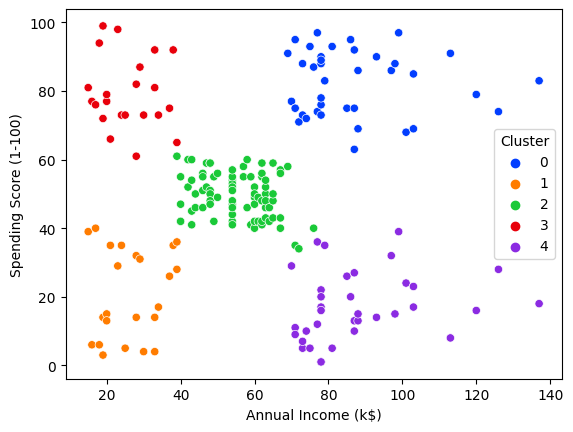

In [8]:
# Defining the colors that is used for each cluster
clr = sns.color_palette("bright", n_colors=5)

# Create a scatter plot of the data points colored by cluster assignment
ax = sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette=clr)

# Add tooltips to the plot
cursor = mplcursors.cursor(ax, hover=True)

@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
#  "Annual Income (k$)", "Spending Score (1-100)"
    text = f"Customer: {index}\nIncome: {data.loc[index, 'Annual Income (k$)']}\nScore: {data.loc[index, 'Spending Score (1-100)']}"
    sel.annotation.set_text(text)
